In [1]:
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
ex = pd.read_csv('../data/ALL_EXHIBITIONS (post 90).csv', sep=';', encoding='utf-8', low_memory=False)
art = pd.read_csv('../data/ALL_ARTWORKS.csv', sep=',', encoding='utf-8', low_memory=False)

In [3]:
clean = pd.read_csv('../data/ALL_EXHIBITIONS (post 90 with collection).csv', sep=';', encoding='utf-8', low_memory=False)

In [4]:
ex.sample(3)

,exhibition,title,place,museum,town,time,start_date,end_date,artworks
10199,Max Ernst - Die Retrospektive : Berlin (Allema...,Max Ernst - Die Retrospektive,"Berlin (Allemagne), Staatliche Museen zu Berli...",Staatliche Museen zu Berlin Preussischter Kult...,Berlin (Allemagne),05 mars 1999-30 mai 1999,1999-03-05,1999-05-30,150000000019162 | 150000000027122
37686,"Une heure, une oeuvre : Châlons-en-Champagne (...","Une heure, une oeuvre","Châlons-en-Champagne (France), Ecole primaire ...",Ecole primaire Paul Lapie,Châlons-en-Champagne (France),04 novembre 2016-05 novembre 2016,2016-11-04,2016-11-05,360000000015905
34529,Aux portes du royaume : Saint-Cyr-sur-Morin (F...,Aux portes du royaume,"Saint-Cyr-sur-Morin (France), Musée des Pays d...",Musée des Pays de Seine-et-Marne,Saint-Cyr-sur-Morin (France),20 septembre 2003-29 février 2004,2003-09-20,2004-02-29,390000000000599 | 390000000000601 | 3900000000...


In [5]:
# exposed = [[e for e in re.split(r' \| ', x['artworks'])] for i, x in ex.iterrows()]
# exposed = pd.Series(list(set([e for row in exposed for e in row])))

ex['collection'] = None
ex['acquisition_year'] = None
for i, e in ex.iterrows():
    artworks = re.split(r' \| ', e['artworks'])
    cols, years = [], []
    for a in artworks:
        col = art[art['_id'] == int(a)]['collection'].values[0]
        if not pd.isnull(col):
            cols.append(col)
        year = art[art['_id'] == int(a)]['acquisition_year'].values[0]
        if not pd.isnull(year):
            years.append(year)
    if len(years) > 0:
        ex.at[i, 'acquisition_year'] = min(years)
    if len(set(cols)) == 1:
        ex.at[i, 'collection'] = cols[0]
    if i % 10000 == 0:
        print("Percentage:", int(i/len(ex) * 100), "total:", i)

In [6]:
for c in clean.columns:
    print("---- %s ---" % c)
    print(f'Count: {clean[c].count()}\tProportion: {round(100*clean[c].count()/clean["exhibition"].count(), 3)}%\t Diff: {- clean[c].count() + clean["exhibition"].count()}')

---- Column1 ---
Count: 59602	Proportion: 100.0%	 Diff: 0
---- exhibition ---
Count: 59602	Proportion: 100.0%	 Diff: 0
---- title ---
Count: 57045	Proportion: 95.71%	 Diff: 2557
---- place ---
Count: 51442	Proportion: 86.309%	 Diff: 8160
---- museum ---
Count: 51597	Proportion: 86.569%	 Diff: 8005
---- town ---
Count: 51686	Proportion: 86.719%	 Diff: 7916
---- time ---
Count: 57138	Proportion: 95.866%	 Diff: 2464
---- start_date ---
Count: 57152	Proportion: 95.889%	 Diff: 2450
---- end_date ---
Count: 57152	Proportion: 95.889%	 Diff: 2450
---- artworks ---
Count: 59602	Proportion: 100.0%	 Diff: 0
---- collection ---
Count: 57635	Proportion: 96.7%	 Diff: 1967
---- acquisition_year ---
Count: 58891	Proportion: 98.807%	 Diff: 711


In [7]:
# ex['town'].sample(10)

In [8]:
# ex['collection'].sample(10)

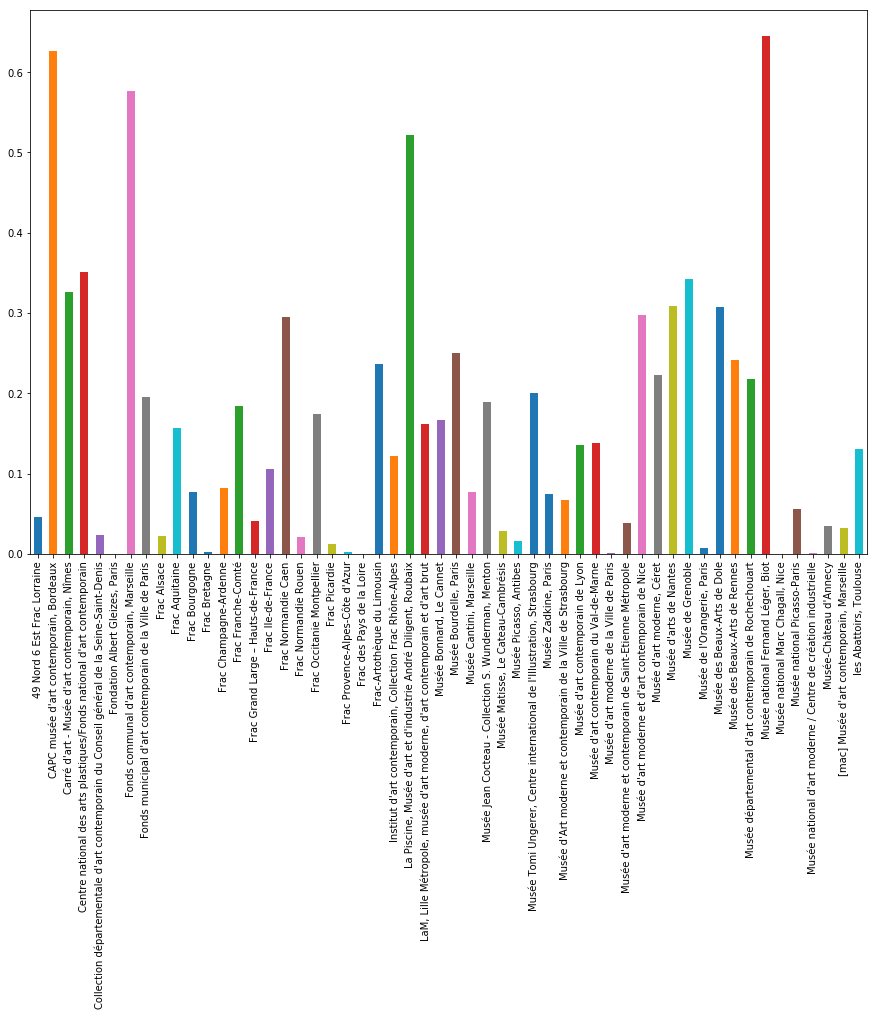

In [9]:
a = clean['collection'].value_counts()
b = clean[pd.isnull(clean['town'])]['collection'].value_counts()
x = b/a
x.plot(kind='bar', figsize=(15,10))

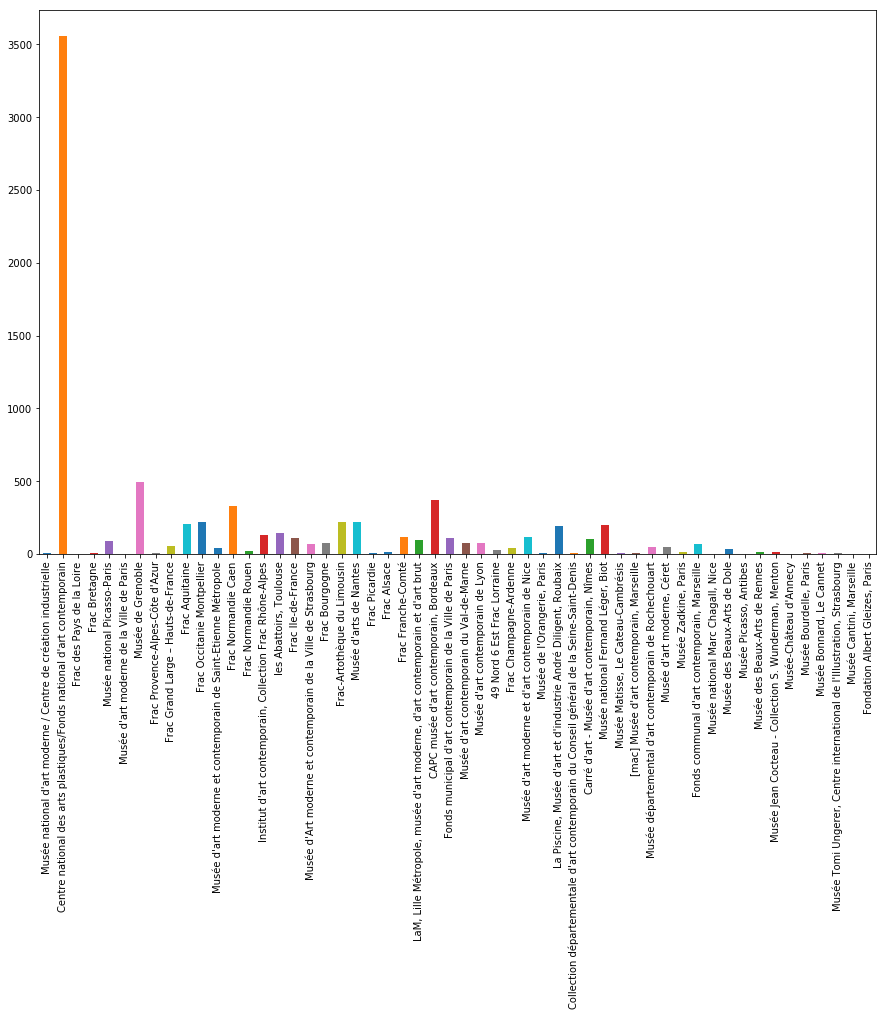

In [10]:
bad = clean[pd.isnull(clean['town'])]
bad['collection'].value_counts()
new = bad['collection'].value_counts().reindex(clean['collection'].value_counts().index)
new.index = clean['collection'].value_counts().index
new.plot(kind='bar', figsize=(15,10))

In [11]:
subset = clean[(clean['collection'].str.contains("Musée national d'art moderne", na=False)) & (pd.isnull(clean['town']))]

In [12]:
# ex.to_csv("../data/ALL_EXHIBITIONS (post 90 with collection).csv", sep=';', encoding='utf-8',)

In [13]:
subset.sample(5)

,Column1,exhibition,title,place,museum,town,time,start_date,end_date,artworks,collection,acquisition_year
40081,40151,"Geneviève Asse, Stèles : 10 mars 2006-05 juin ...","Geneviève Asse, Stèles",NaN,NaN,NaN,10 mars 2006-05 juin 2006,2006-03-10,2006-06-05,150000000701165,Musée national d'art moderne / Centre de créat...,2012.0
59492,60148,"Accrochage ""Made in France""en janvier 1997. Le...","Accrochage ""Made in France""",NaN,NaN,NaN,NaN,1997-00-00,1997-00-00,150000000028340,Musée national d'art moderne / Centre de créat...,1989.0
52392,53030,Le mouvement des images : 2006-,Le mouvement des images,NaN,NaN,NaN,2006,2006-00-00,2006-00-00,150000000046197 | 150000000027355,Musée national d'art moderne / Centre de créat...,1996.0
15866,15874,Roger-Edgar Gillet : 50 ans de peinture : 26 j...,Roger-Edgar Gillet : 50 ans de peinture,NaN,NaN,NaN,26 juin 1999-27 septembre 1999,1999-06-26,1999-09-27,150000001546962,Musée national d'art moderne / Centre de créat...,2017.0
8610,8613,La route bleue : Raoul Dufy en pays de Langres...,La route bleue : Raoul Dufy en pays de Langres,NaN,NaN,NaN,19 mai 2012-20 août 2012,2012-05-19,2012-08-20,150000000020615,Musée national d'art moderne / Centre de créat...,1963.0


In [15]:
# data['start_date'] = data['start_date']
ex['start_year'] = ex['start_date'].str.split("-").str[0]
ex['start_month'] = ex['start_date'].str.split("-").str[1]
ex['start_day'] = ex['start_date'].str.split("-").str[2]
# data['start_month']

In [17]:
clean[clean['collection'] == 'Musée national Fernand Léger, Biot']['exhibition'].value_counts()

Willy Baumeister et la France : Colmar (France), Musée d'Unterlinden, 04 septembre 1999-05 décembre 1999 // Saint-Etienne (France), Musée d'art et d'industrie de Saint-Etienne, 20 décembre 1999-26 mars 2000                                                                                                                             2
La Grande Parade, Portrait de l'artiste en clown. : Paris (France), Galeries nationales du Grand Palais, 09 février 2004-31 mai 2004 // Ottawa (Canada), National Gallery of Canada, 25 juin 2004-30 août 2004                                                                                                                             2
FERNAND LEGER, Musée des Beaux-Arts, Bilbao, 6 novembre-28 décembre, l'exposition va ensuite au musée diocesano de Malaga 07 janvier - 13 février, musée des Beaux-Arts de Zaragoza 23 février- 28 mars.cat. repr. p. 23. : 1992-                                                                                                          1
F